### Nama : Gulfi Oktariani 
### NIM    : 09011381823118

### Feature Selection
#### Data set yang digunakan yaitu Collage Basketball  
Refrensi :https://www.kaggle.com/andrewsundberg/college-basketball-dataset?select=cbb19.csv

In [1]:
import numpy as np
import pandas as pd

In [2]:
cbb = pd.read_csv("cbb19.csv")

In [3]:
cbb.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
0,Gonzaga,WCC,37,33,123.4,89.9,0.9744,59.0,44.2,14.9,...,35.3,25.9,61.4,43.4,36.3,30.4,72.0,7.0,E8,1.0
1,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,29.1,26.3,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0
2,Duke,ACC,38,32,118.9,89.2,0.9646,53.6,45.0,17.5,...,33.2,24.0,58.0,45.0,30.8,29.9,73.6,11.2,E8,1.0
3,North Carolina,ACC,36,29,120.1,91.4,0.9582,52.9,48.9,17.2,...,30.2,28.4,52.1,47.9,36.2,33.5,76.0,10.0,S16,1.0
4,Michigan,B10,37,30,114.6,85.6,0.9665,51.6,44.1,13.9,...,27.5,24.1,51.8,44.3,34.2,29.1,65.9,9.2,S16,2.0


In [6]:
numcols = ['G','W','ADJOE','ADJDE','BARTHAG','EFG_O','EFG_D','TOR','TORD','ORB','DRB','FTR','FTRD','2P_O','2P_D','3P_O','3P_D','ADJ_T','WAB','SEED']
catcols = ['TEAM','POSTSEASON']

In [7]:
cbb = cbb[numcols + catcols]

In [8]:
cbb.head()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,TEAM,POSTSEASON
0,37,33,123.4,89.9,0.9744,59.0,44.2,14.9,19.0,31.5,...,25.9,61.4,43.4,36.3,30.4,72.0,7.0,1.0,Gonzaga,E8
1,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,17.5,30.4,...,26.3,52.5,45.7,39.5,28.9,60.7,11.1,1.0,Virginia,Champions
2,38,32,118.9,89.2,0.9646,53.6,45.0,17.5,19.4,35.6,...,24.0,58.0,45.0,30.8,29.9,73.6,11.2,1.0,Duke,E8
3,36,29,120.1,91.4,0.9582,52.9,48.9,17.2,18.3,35.3,...,28.4,52.1,47.9,36.2,33.5,76.0,10.0,1.0,North Carolina,S16
4,37,30,114.6,85.6,0.9665,51.6,44.1,13.9,18.0,24.7,...,24.1,51.8,44.3,34.2,29.1,65.9,9.2,2.0,Michigan,S16


In [9]:
traincbb = pd.concat([cbb[numcols], pd.get_dummies(cbb[catcols])], axis=1)
features = traincbb.columns

traincbb = traincbb.dropna()

In [10]:
traincbb = pd.DataFrame(traincbb,columns=features)

In [21]:
Y = traincbb['G'] >= 30
X = traincbb.copy()
del X['G']

In [25]:
X.shape 

(68, 380)

Memiliki 68 Baris dan 380 Kolom

In [22]:
Y.head()

0    True
1    True
2    True
3    True
4    True
Name: G, dtype: bool

In [23]:
len(X.columns)

380

Memiliki 380 kolom 

In [26]:
num_feats =30

In [28]:
feature_name = list(X.columns)
feature_name

['W',
 'ADJOE',
 'ADJDE',
 'BARTHAG',
 'EFG_O',
 'EFG_D',
 'TOR',
 'TORD',
 'ORB',
 'DRB',
 'FTR',
 'FTRD',
 '2P_O',
 '2P_D',
 '3P_O',
 '3P_D',
 'ADJ_T',
 'WAB',
 'SEED',
 'TEAM_Abilene Christian',
 'TEAM_Air Force',
 'TEAM_Akron',
 'TEAM_Alabama',
 'TEAM_Alabama A&M',
 'TEAM_Alabama St.',
 'TEAM_Albany',
 'TEAM_Alcorn St.',
 'TEAM_American',
 'TEAM_Appalachian St.',
 'TEAM_Arizona',
 'TEAM_Arizona St.',
 'TEAM_Arkansas',
 'TEAM_Arkansas Pine Bluff',
 'TEAM_Arkansas St.',
 'TEAM_Army',
 'TEAM_Auburn',
 'TEAM_Austin Peay',
 'TEAM_BYU',
 'TEAM_Ball St.',
 'TEAM_Baylor',
 'TEAM_Belmont',
 'TEAM_Bethune Cookman',
 'TEAM_Binghamton',
 'TEAM_Boise St.',
 'TEAM_Boston College',
 'TEAM_Boston University',
 'TEAM_Bowling Green',
 'TEAM_Bradley',
 'TEAM_Brown',
 'TEAM_Bryant',
 'TEAM_Bucknell',
 'TEAM_Buffalo',
 'TEAM_Butler',
 'TEAM_Cal Baptist',
 'TEAM_Cal Poly',
 'TEAM_Cal St. Bakersfield',
 'TEAM_Cal St. Fullerton',
 'TEAM_Cal St. Northridge',
 'TEAM_California',
 'TEAM_Campbell',
 'TEAM_Can

## 1. Filter based-Pearson Correlation
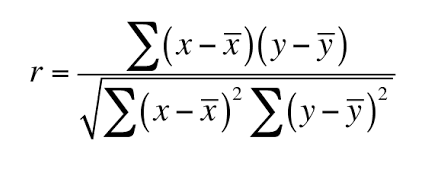

In [30]:
def cor_selector(X, Y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with Y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], Y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, Y,num_feats)
print(str(len(cor_feature)), 'selected features')

C:\Users\Gulfi Oktariani\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Gulfi Oktariani\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


30 selected features


In [31]:
cor_feature

['TEAM_Montana',
 'TEAM_Prairie View A&M',
 'TEAM_Iona',
 'TEAM_North Dakota St.',
 'TEAM_North Carolina Central',
 'TEAM_Fairleigh Dickinson',
 'ADJOE',
 'POSTSEASON_F4',
 'TOR',
 'POSTSEASON_E8',
 'POSTSEASON_R68',
 'EFG_D',
 'POSTSEASON_S16',
 '3P_O',
 'BARTHAG',
 'WAB',
 'POSTSEASON_R32',
 'W',
 'FTR',
 '3P_D',
 'ORB',
 'DRB',
 'POSTSEASON_R64',
 'ADJDE',
 'SEED',
 'EFG_O',
 '2P_O',
 'ADJ_T',
 'TORD',
 'TEAM_Yale']

## 2. Chi-Squared
Kemudian kita dapat menggunakan rumus di bawah ini untuk menjumlahkan semua 4 sel: 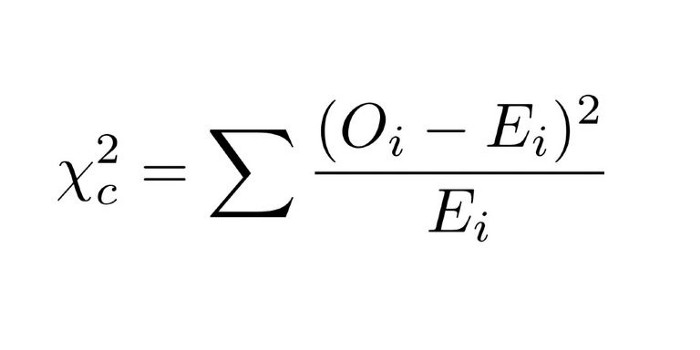

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, Y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

30 selected features


In [34]:
chi_feature

['W',
 'ADJDE',
 'BARTHAG',
 'EFG_O',
 'TORD',
 'ORB',
 'DRB',
 'FTR',
 '2P_O',
 '3P_O',
 '3P_D',
 'ADJ_T',
 'WAB',
 'SEED',
 'TEAM_Vermont',
 'TEAM_Villanova',
 'TEAM_Virginia',
 'TEAM_Virginia Tech',
 'TEAM_Washington',
 'TEAM_Wisconsin',
 'TEAM_Wofford',
 'TEAM_Yale',
 'POSTSEASON_2ND',
 'POSTSEASON_Champions',
 'POSTSEASON_E8',
 'POSTSEASON_F4',
 'POSTSEASON_R32',
 'POSTSEASON_R64',
 'POSTSEASON_R68',
 'POSTSEASON_S16']

## 3. Recursive Feature Elimination

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, Y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 380 features.
Fitting estimator with 370 features.
Fitting estimator with 360 features.
Fitting estimator with 350 features.
Fitting estimator with 340 features.
Fitting estimator with 330 features.
Fitting estimator with 320 features.
Fitting estimator with 310 features.
Fitting estimator with 300 features.
Fitting estimator with 290 features.
Fitting estimator with 280 features.
Fitting estimator with 270 features.
Fitting estimator with 260 features.
Fitting estimator with 250 features.
Fitting estimator with 240 features.
Fitting estimator with 230 features.
Fitting estimator with 220 features.
Fitting estimator with 210 features.
Fitting estimator with 200 features.
Fitting estimator with 190 features.
Fitting estimator with 180 features.
Fitting estimator with 170 features.
Fitting estimator with 160 features.
Fitting estimator with 150 features.
Fitting estimator with 140 features.
Fitting estimator with 130 features.
Fitting estimator with 120 features.
F

C:\Users\Gulfi Oktariani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gulfi Oktariani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gulfi Oktariani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gulfi Oktariani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gulfi Oktariani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed

## 4. Lasso: SelectFromModel

In [40]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"), max_features=num_feats)
embeded_lr_selector.fit(X_norm, Y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

0 selected features


## 5. Tree-based: SelectFromModel

In [42]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X, Y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

25 selected features


##### Kita juga dapat menggunakan LightGBM. Atau objek XGBoost asalkan memiliki atribut feature_importances_ .

In [47]:
!pip install lightgbm

In [48]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X, Y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

30 selected features


In [49]:
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)


,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,WAB,True,True,True,False,True,True,5
2,W,True,True,True,False,True,True,5
3,TORD,True,True,True,False,True,True,5
4,SEED,True,True,True,False,True,True,5
5,ORB,True,True,True,False,True,True,5
6,FTR,True,True,True,False,True,True,5
7,EFG_O,True,True,True,False,True,True,5
8,DRB,True,True,True,False,True,True,5
9,BARTHAG,True,True,True,False,True,True,5
10,ADJ_T,True,True,True,False,True,True,5


Tabel diatas merupakan hasil dari semua feature yang digunakan dalam data yang digunakan, dapat kita lihat bahwa WAB, W,TORD,SEED,FTR, EFG_O,DRB, BARTHAG, ADJ_T, ADJDE, 3P_O, 3P_D, 2P_O adalah atribut yang sangat baik untuk dimiliki pemain berperingkat tinggi. 